
# Gradient Descent Intro
 <p>

In [1]:
from __future__ import print_function, division

%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([0.5501, 0.2401, 0.8841, 0.9909, 0.7814, 0.6887, 0.7656, 0.3195, 0.2424, 0.8133, 0.3435,
       0.8786, 0.007 , 0.8998, 0.9184, 0.8654, 0.8538, 0.0027, 0.1439, 0.6115, 0.6188, 0.4153,
       0.9036, 0.732 , 0.8349, 0.7632, 0.0434, 0.066 , 0.0814, 0.3716])

In [6]:
y

array([ 9.6504,  8.7204, 10.6522, 10.9727, 10.3442, 10.0662, 10.2967,  8.9586,  8.7273, 10.44  ,
        9.0306, 10.6357,  8.021 , 10.6994, 10.7551, 10.5963, 10.5615,  8.0082,  8.4317,  9.8346,
        9.8563,  9.2459, 10.7108, 10.196 , 10.5047, 10.2896,  8.1303,  8.198 ,  8.2443,  9.1148])

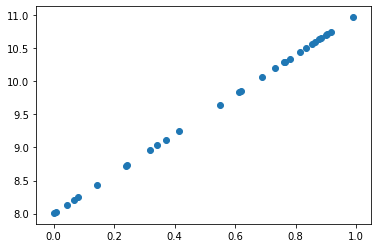

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.308214162808609

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani